In [7]:
import json
from pathlib import Path
from sklearn.tree import DecisionTreeClassifier
from sentence_transformers import SentenceTransformer
bert = SentenceTransformer('all-MiniLM-L6-v2')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [8]:


def flatten(list_of_list):
    return [item for sublist in list_of_list for item in sublist]

path_to_training = Path("training")
path_to_test = Path("test")

#####
# training and test sets of transcription ids
#####
training_set = ['ES2002', 'ES2005', 'ES2006', 'ES2007', 'ES2008', 'ES2009', 'ES2010', 'ES2012', 'ES2013', 'ES2015', 'ES2016', 'IS1000', 'IS1001', 'IS1002', 'IS1003', 'IS1004', 'IS1005', 'IS1006', 'IS1007', 'TS3005', 'TS3008', 'TS3009', 'TS3010', 'TS3011', 'TS3012']
training_set = flatten([[m_id+s_id for s_id in 'abcd'] for m_id in training_set])
training_set.remove('IS1002a')
training_set.remove('IS1005d')
training_set.remove('TS3012c')

test_set = ['ES2003', 'ES2004', 'ES2011', 'ES2014', 'IS1008', 'IS1009', 'TS3003', 'TS3004', 'TS3006', 'TS3007']
test_set = flatten([[m_id+s_id for s_id in 'abcd'] for m_id in test_set])
y_training = []
with open("training_labels.json", "r") as file:
    training_labels = json.load(file)
X_training = []
for transcription_id in training_set:
    with open(path_to_training / f"{transcription_id}.json", "r") as file:
        transcription = json.load(file)
    
    for utterance in transcription:
        X_training.append(utterance["speaker"] + ": " + utterance["text"])
    
    y_training += training_labels[transcription_id]


In [12]:
dataset=pd.DataFrame({'feaures': X_training, 'labels': y_training})

In [13]:
dataset.head()

,feaures,labels
0,PM: Okay,0
1,PM: Right,0
2,PM: <vocalsound> Um well this is the kick-off ...,1
3,PM: Um <vocalsound> and um,0
4,PM: this is just what we're gonna be doing ove...,0


In [21]:
important=dataset[dataset["labels"]==1]

important["NombreDeMots"]=important["feaures"].apply(lambda x: len(x.split()))

C:\Users\mouha\AppData\Local\Temp\ipykernel_19128\1816244739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important["NombreDeMots"]=important["feaures"].apply(lambda x: len(x.split()))


In [34]:
important["NombreDeMots"].value_counts().sort_index()

NombreDeMots
2       5
3      76
4     141
5     314
6     453
     ... 
63      1
68      1
70      1
71      2
73      1
Name: count, Length: 63, dtype: int64

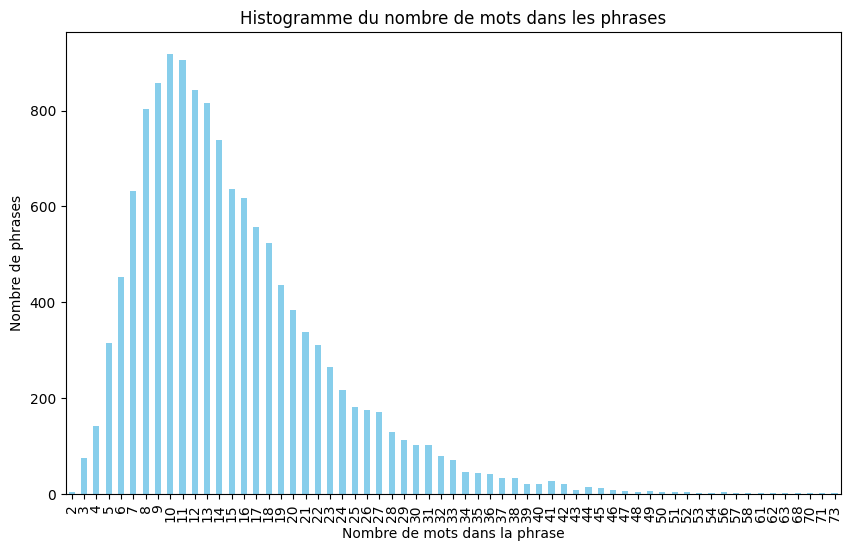

In [35]:
import matplotlib.pyplot as plt

# Calculer le nombre de phrases pour chaque nombre de mots
histogram = important["NombreDeMots"].value_counts().sort_index()

# Tracer l'histogramme
plt.figure(figsize=(10, 6))
histogram.plot(kind='bar', color='skyblue')
plt.xlabel('Nombre de mots dans la phrase')
plt.ylabel('Nombre de phrases')
plt.title('Histogramme du nombre de mots dans les phrases')
plt.show()


C:\Users\mouha\AppData\Local\Temp\ipykernel_19128\3691204051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_important["NombreDeMots"]=not_important["feaures"].apply(lambda x: len(x.split()))


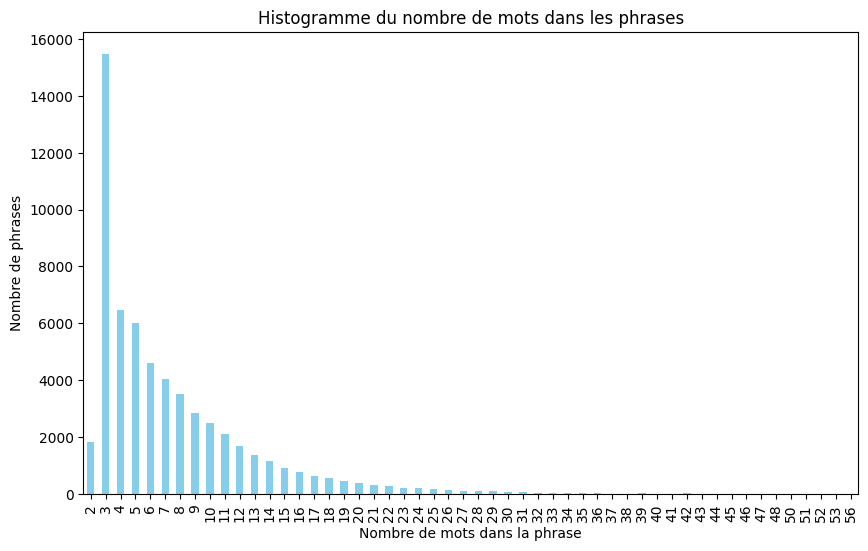

In [36]:
not_important=dataset[dataset["labels"]==0]
not_important["NombreDeMots"]=not_important["feaures"].apply(lambda x: len(x.split()))
import matplotlib.pyplot as plt

# Calculer le nombre de phrases pour chaque nombre de mots
histogram = not_important["NombreDeMots"].value_counts().sort_index()

# Tracer l'histogramme
plt.figure(figsize=(10, 6))
histogram.plot(kind='bar', color='skyblue')
plt.xlabel('Nombre de mots dans la phrase')
plt.ylabel('Nombre de phrases')
plt.title('Histogramme du nombre de mots dans les phrases')
plt.show()
